In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.display import display
from tqdm.notebook import tqdm
plt.style.use('seaborn-white')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
data = load_digits()
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier  = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)
scores = model_selection.cross_val_score(tree_classifier, X, y, cv=10, n_jobs=-1)
ans_1 = scores.mean()

In [6]:
ans_1

0.8263718187461204

In [7]:
def write_answer(ans, name):
    with open(f"{name}.txt", "w") as fout:
        fout.write(str(ans))
        
write_answer(ans_1, 'ans_1')

In [38]:
with open('ans_5.txt', 'w') as fout:
  fout.write('2 3 4 7')

In [8]:
bag_clf = BaggingClassifier(
    tree_classifier, n_estimators=100
)
scores = model_selection.cross_val_score(bag_clf, X, y, cv=10, n_jobs=-1)
ans_2 = scores.mean()

In [9]:
ans_2
write_answer(ans_2, 'ans_2')

In [9]:
bag_clf_random_subspace = BaggingClassifier(
    tree_classifier, n_estimators=100, max_features = 8
)
scores = model_selection.cross_val_score(bag_clf, X, y, cv=10, n_jobs=-1)
ans_3 = scores.mean()

In [10]:
ans_3
write_answer(ans_3, 'ans_3')

In [11]:
tree_classifier = DecisionTreeClassifier(max_features=8)
bag_clf_tree = BaggingClassifier(
    tree_classifier, n_estimators=100
)
scores = model_selection.cross_val_score(bag_clf_tree, X, y, cv=10, n_jobs=-1)
ans_4 = scores.mean()
write_answer(ans_4, 'ans_4')

In [12]:
ans_4

0.9543668528864059

In [13]:
random_forest = RandomForestClassifier()
bag_clf_random_subspace = BaggingClassifier(
    tree_classifier, n_estimators=100
)
scores = model_selection.cross_val_score(random_forest, X, y, cv=10, n_jobs=-1)
ans_5 = scores.mean()
write_answer(ans_5, 'misc')

In [14]:
ans_5

0.9549162011173185

In [15]:
from collections import defaultdict

In [17]:
var_scores = []
dct = defaultdict()

In [18]:
X.shape

(1797, 64)

In [28]:
from joblib import dump, load
# joblib.dump(mymodel, 'mymodel.pkl')
# mymodel_loaded = joblib.load('mymodel.pkl')

In [33]:
dump(rfc, 'models/rfc.pkl')

['models/rfc.pkl']

In [ ]:
for i in tqdm(range(5, 61, 5), desc='features loop'):
  for j in tqdm(range(15, 151, 15), desc='estimators loop'):
    for k in tqdm(range(5, 51, 5), desc='depth loop', leave=False):
      dct[(i,j,k)] = []
      rfc = RandomForestClassifier(n_estimators=j, max_features=i, max_depth=k, n_jobs=-1)
      rfc.fit(X, y)
      scores = model_selection.cross_val_score(rfc, X, y, cv=3, n_jobs=-1)
      dct[(i,j,k)].append(scores.mean())

In [20]:
rfc.score

<bound method ClassifierMixin.score of RandomForestClassifier(max_depth=50, max_features=60, n_estimators=150,
                       n_jobs=-1)>

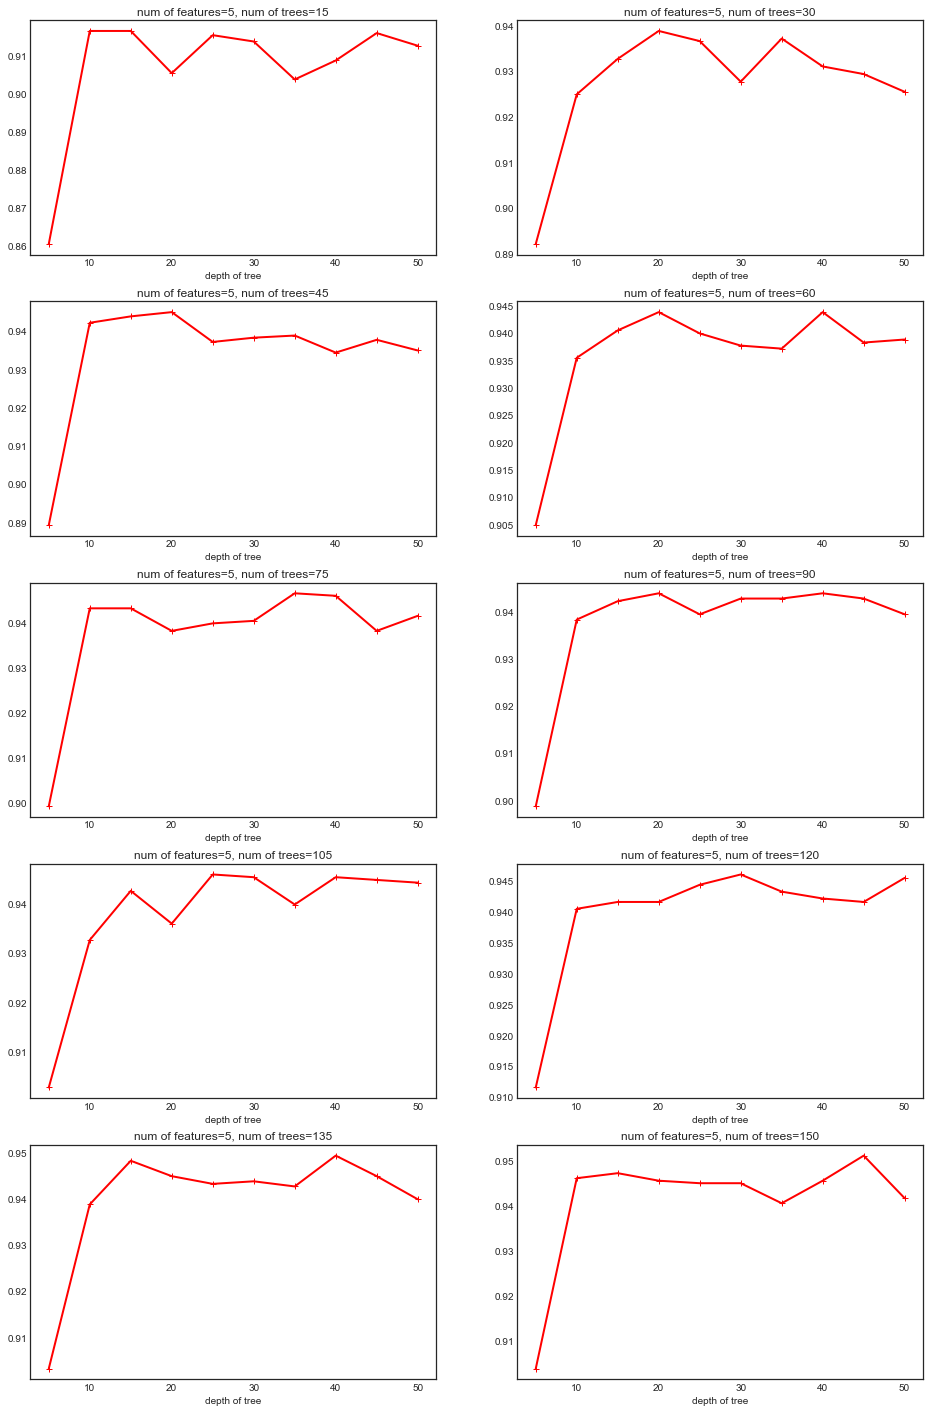

In [21]:
fig = plt.figure(figsize=(16, 25))
for num,  j in  zip(range(1,11), range(15, 151, 15)):
  to_draw = [dct[(5, j, i)] for i in range(5, 51, 5)]
  ax = fig.add_subplot(5, 2, num)
  ax.plot(list(range(5, 51, 5)), to_draw, 'r-+', linewidth=2)
  ax.set_title(f'num of features=5, num of trees={j}')
  ax.set_xlabel('depth of tree')
  #ax.ylabel('')
  #ax.legend(loc='center')
#plt.show()

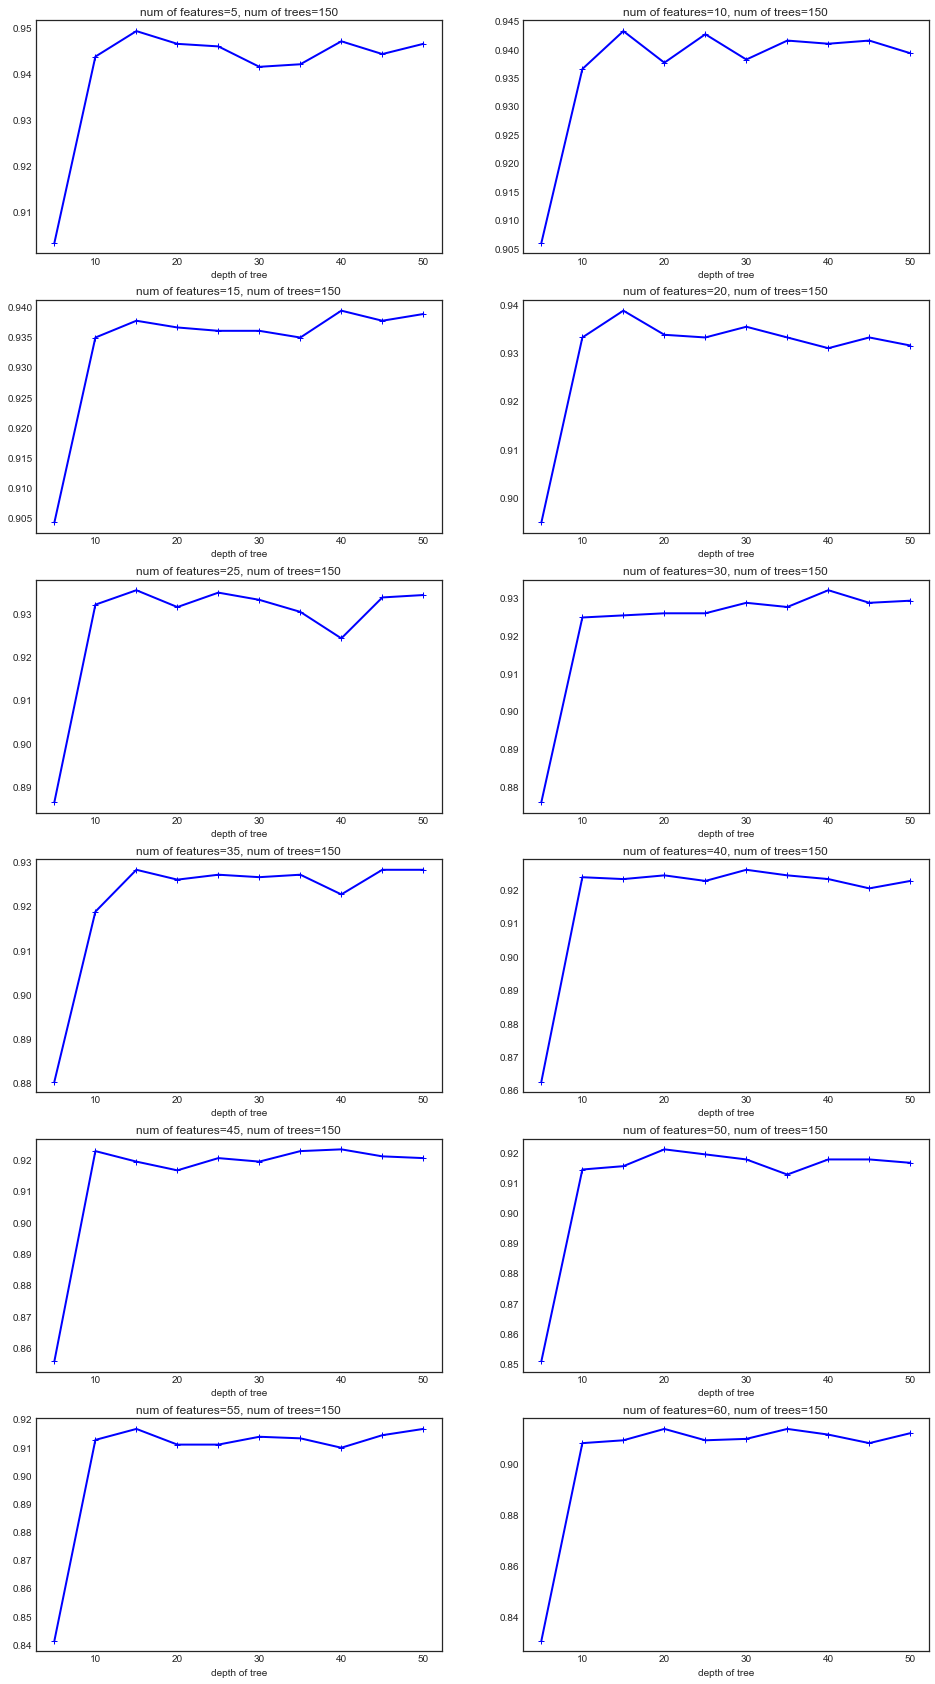

In [26]:
fig = plt.figure(figsize=(16, 30))
for num,  j in  zip(range(1,13), range(5, 61, 5)):
  to_draw = [dct[(j, 150, i)] for i in range(5, 51, 5)]
  ax = fig.add_subplot(6, 2, num)
  ax.plot(list(range(5, 51, 5)), to_draw, 'b-+', linewidth=2)
  ax.set_title(f'num of features={j}, num of trees=150')
  ax.set_xlabel('depth of tree')